In [4]:
#! pip3 install pandas
# ! sudo pip3 install scipy --upgrade
# ! sudo pip3 install numpy --upgrade
# ! sudo pip3 install imblearn

The directory '/home/FDSM_lhn/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/FDSM_lhn/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 153kB 3.4MB/s ta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import data_vis
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# train = pd.read_csv('datasets/train.csv')

# # train.head
# train.iloc[:10,:10]
# N, _ = train.shape

# for i in range(3):
#     file = "datasets/train_batch_{}".format(i)
#     with open(file,'wb') as f:
#         pickle.dump(train.iloc[int(2e5)*i:min(N+1,int(2e5) * (i+1)),:] ,file = f)
    
# test = pd.read_csv('datasets/test.csv')
# test.shape

# N, _ = test.shape

# for i in range(5):
#     file = "datasets/test_batch_{}".format(i)
#     with open(file,'wb') as f:
#         pickle.dump(test.iloc[int(2e5)*i:min(N+1,int(2e5) * (i+1)),:] ,file = f)

In [3]:
import data_util

train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

print(X_train.shape ,X_val.shape)
# dev_train.dtypes
# dev_train.head
# train_data.isnull().any()

NameError: name 'X_train' is not defined

In [9]:
train_data.isnull().any()
test_data[test_data==-1] = None
test_data.isnull().any()
#train_data.head(10)

id                False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12         False
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [30]:
#test_data.ps_car_03_cat
# from sklearn.preprocessing import OneHotEncoder

# pd.get_dummies(test_data.ps_car_03_cat, dummy_na=True)
# OneHotEncoder().fit_transform( X= test_data.ps_car_03_cat)
train_data[train_data==-1] = np.nan
train_data.isnull().any()

train_data.head(100)
train_data[[i for i in train_data.columns if 'bin' not in i and 'cat' not in i]].mean(axis=0, ).values

array([  7.43803558e+05,   3.64475179e-02,   1.90037835e+00,
         4.42331808e+00,   1.24510259e-02,   7.29992171e+00,
         6.10991378e-01,   4.39184358e-01,   8.94047327e-01,
         2.34609976e+00,   3.79947134e-01,   8.13264676e-01,
         3.74690639e-01,   3.06589944e+00,   4.49756389e-01,
         4.49589222e-01,   4.49848793e-01,   2.37208087e+00,
         1.88588604e+00,   7.68944511e+00,   3.00582314e+00,
         9.22590438e+00,   2.33903382e+00,   8.43359005e+00,
         5.44138223e+00,   1.44191817e+00,   2.87228752e+00,
         7.53902643e+00])

# Try Different Package for NN

In [2]:
import torch 
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

input_size = 235
hidden_size = [300,250,200]
num_classes = 2
num_epochs = 5
batch_size = 5000
learning_rate = 0.0005
weight_decay = 1e-5

# X_dev_tensor = torch.from_numpy(X_dev.values)
# y_dev_tensor = torch.from_numpy(y_dev.values)

# X_dev_tensor= X_dev_tensor.float()
# y_dev_tensor =y_dev_tensor.type(torch.LongTensor)
# #print(X_train_tensor)
# X_dev_Variable = Variable(X_dev_tensor)
# y_dev_Variable = Variable(y_dev_tensor)

X_train_tensor = torch.from_numpy(X_train.values)
y_train_tensor = torch.from_numpy(y_train.values)

X_train_tensor= X_train_tensor.float()
y_train_tensor =y_train_tensor.type(torch.LongTensor)
#print(X_train_tensor)
X_train_Variable = Variable(X_train_tensor)
y_train_Variable = Variable(y_train_tensor)


train_set = Data.TensorDataset(data_tensor=X_train_tensor, target_tensor=y_train_tensor )



train_loader = Data.DataLoader(
    dataset=train_set,      
    batch_size=batch_size,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2)              # subprocesses for loading data


# train_loader = Data.DataLoader(dataset=train_dataset, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)

# test_loader = Data.DataLoader(dataset=test_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)
    
class My_Net(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(My_Net,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0],hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1],hidden_size[2])
        self.fc4 = nn.Linear(hidden_size[2], num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out
        
net = My_Net(input_size, hidden_size,num_classes)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=weight_decay)

for epoch in range(num_epochs):
    for i,  (batch_x, batch_y) in enumerate(train_loader):
#         print(batch_x)
        x,  y = Variable(batch_x), Variable(batch_y)
        out = net(x)
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 10 ==0:
            print('epoch {}: iteration {}, the loss is {}'.format(epoch,i ,loss))

epoch 0: iteration 0, the loss is Variable containing:
 0.7110
[torch.FloatTensor of size 1]

epoch 0: iteration 10, the loss is Variable containing:
 0.1808
[torch.FloatTensor of size 1]

epoch 0: iteration 20, the loss is Variable containing:
 0.1641
[torch.FloatTensor of size 1]

epoch 0: iteration 30, the loss is Variable containing:
 0.1527
[torch.FloatTensor of size 1]

epoch 0: iteration 40, the loss is Variable containing:
 0.1607
[torch.FloatTensor of size 1]

epoch 0: iteration 50, the loss is Variable containing:
 0.1577
[torch.FloatTensor of size 1]

epoch 0: iteration 60, the loss is Variable containing:
 0.1616
[torch.FloatTensor of size 1]

epoch 0: iteration 70, the loss is Variable containing:
 0.1566
[torch.FloatTensor of size 1]

epoch 0: iteration 80, the loss is Variable containing:
 0.1624
[torch.FloatTensor of size 1]

epoch 0: iteration 90, the loss is Variable containing:
 0.1706
[torch.FloatTensor of size 1]

epoch 0: iteration 100, the loss is Variable contai

In [15]:
from sklearn.metrics import roc_auc_score            
#try to test it's accuracy
out=  net(X_train_Variable)
out = F.softmax(out)
score_1 = roc_auc_score(y_train_Variable.data.numpy(), out.data.numpy()[:,1])

X_val_tensor = torch.from_numpy(X_val.values)
y_val_tensor = torch.from_numpy(y_val.values)

X_val_tensor= X_val_tensor.float()
y_val_tensor =y_val_tensor.type(torch.LongTensor)
#print(X_train_tensor)
X_val_Variable = Variable(X_val_tensor)
y_val_Variable = Variable(y_val_tensor)
out2=  net(X_val_Variable)
out2 = F.softmax(out2)
score_2 = roc_auc_score(y_val_Variable.data.numpy(), out2.data.numpy()[:,1])

print(out.data.numpy()[:,1].shape)
print(out2.data.numpy()[:,1].shape)
print('test set auc is {}; Val set auc is {}'.format(score_1, score_2))


#So here I've tested that with Variable type, I can run this function
# for t in range(100):
#     out = net(X_train_tensor)                 # input x and predict based on x
#     loss = criterion(out, y_train_tensor)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

#     optimizer.zero_grad()   # clear gradients for next train
#     loss.backward()         # backpropagation, compute gradients
#     optimizer.step()

epoch 0: iteration 0, the loss is Variable containing:
 0.7395
[torch.FloatTensor of size 1]

epoch 0: iteration 10, the loss is Variable containing:
 0.2306
[torch.FloatTensor of size 1]

epoch 0: iteration 20, the loss is Variable containing:
 0.1929
[torch.FloatTensor of size 1]

epoch 0: iteration 30, the loss is Variable containing:
 0.1489
[torch.FloatTensor of size 1]

epoch 0: iteration 40, the loss is Variable containing:
 0.1502
[torch.FloatTensor of size 1]

epoch 0: iteration 50, the loss is Variable containing:
 0.1642
[torch.FloatTensor of size 1]

epoch 0: iteration 60, the loss is Variable containing:
 0.1539
[torch.FloatTensor of size 1]

epoch 0: iteration 70, the loss is Variable containing:
 0.1650
[torch.FloatTensor of size 1]

epoch 0: iteration 80, the loss is Variable containing:
 0.1600
[torch.FloatTensor of size 1]

epoch 1: iteration 0, the loss is Variable containing:
 0.1538
[torch.FloatTensor of size 1]

epoch 1: iteration 10, the loss is Variable containi

In [11]:
print(out.data.numpy()[:,1].shape)
print(out2.data.numpy()[:,1].shape)

(446409,)
(446409,)


In [20]:
print('test set auc is {}; Val set auc is {}'.format(score_1, score_2))


test set auc is 0.6344029175708916; Val set auc is 0.6293206671721198


In [2]:
import data_util
import data_preprocess
import datetime

tic= datetime.datetime.now()
train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

naive_pre = data_preprocess.naive_preprocess()
y_test_index = test_data['id']
test_data.drop(['id'], axis=1, inplace=True)
train_data = naive_pre.dtype_change(train_data)
test_data = naive_pre.dtype_change(test_data)
#train_prop is specified
#X_train, X_val, y_train, y_val = data_util.split_train(train_data,prop=0.75)
y_train = train_data['target']
train_data.drop(['target','id'], axis=1, inplace=True)
X_train = train_data

X_train = naive_pre.scale(X_train)
X_test = naive_pre.scale(test_data,test=True)

#result = y_test_index,

In [5]:
X_test_tensor = torch.from_numpy(X_test.values)

X_test_tensor= X_test_tensor.float()

#print(X_train_tensor)
X_test_Variable = Variable(X_test_tensor)

out=  net(X_test_Variable)
out = F.softmax(out)
#print(out)
prob = out.data.numpy()[:,1]

result = np.hstack((y_test_index, prob))

In [ ]:
np.savetxt("inter.csv", result, delimiter=",",header= 'id, target')

---

---

---

In [36]:
from scipy import special
import data_util
import data_preprocess
from sklearn.model_selection import train_test_split
import datetime
import numpy as np 

rso = np.random.RandomState(66)
tic= datetime.datetime.now()
train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

naive_pre = data_preprocess.naive_preprocess()
train_data = naive_pre.dtype_change(train_data)

X, y = data_util.abandon_col(train_data)

X_train, X_train_test, y_train, y_train_test = train_test_split(X,y,test_size =0.1 ,random_state=rso)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size =0.2, random_state=rso)

X_train = naive_pre.scale(X_train)
X_val = naive_pre.scale(X_val,test=True)
X_train_test = naive_pre.scale(X_train_test,test=True)
X_dev, y_dev = X_train[:10000,:], y_train[:10000]

In [ ]:
data ={}
#enter df here
data['X_train'] = X_train
data['X_val'] = X_val
data['y_train'] = y_train
data['y_val'] =y_val

In [ ]:
from MY_NN import NeuralNetwork

#only use step decay for now
#coarse search
train_hist={}
for i in range(100):
    #learnning_rate 5e-4 too large
    weight_decay = 10** (np.random.uniform(-5,3))#L2 
    learning_rate = 10** (np.random.uniform(-6,-2))
    
    nn_model = NeuralNetwork(data,learning_rate = learning_rate,num_epochs=5,verbose=None,
                             weight_decay=weight_decay,batchnorm=True)
    print('Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay))
    describe= 'Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay)
    nn_model.train()
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    if i+1 %10 ==0:
        print('You have finished {}!!'.format(i+1))

        
filename= 'coarse_search_lr_wd.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_hist, f)

In [ ]:
#choose the best and plot it to see how it's going.

lr =0.0021465415548623146
wd = 0.0804501958708467
nn_model = NeuralNetwork(data,learning_rate = lr,num_epochs=8,verbose=True,
                             weight_decay=wd,batchnorm=True)
nn_model.train()

In [13]:
a =sorted(train_hist, key=lambda x:x[0],reverse=True)
for i in a:
    print(train_hist[i])

Learning rate is 0.0021465415548623146. Weight decay is 1.280121140426467e-05
Learning rate is 0.0017971189876773489. Weight decay is 1.5106300733936622e-05
Learning rate is 0.001099954554802058. Weight decay is 0.0010046656425585008
Learning rate is 0.00870610484058397. Weight decay is 3.456569495233953e-05
Learning rate is 0.0014013584836759304. Weight decay is 0.004239152526071397
Learning rate is 0.0018023955710091929. Weight decay is 8.4753451426549e-05
Learning rate is 0.0015241883796123918. Weight decay is 4.2478230879085716e-05
Learning rate is 0.0008147044361914067. Weight decay is 0.0022323437500745627
Learning rate is 0.0049586139060953695. Weight decay is 0.00111846699640101
Learning rate is 0.006824257588204783. Weight decay is 0.0006103289317873098
Learning rate is 0.0019428041601537536. Weight decay is 0.0037230961634756765
Learning rate is 0.0015651286837204412. Weight decay is 0.007209162252832926
Learning rate is 0.0003602157173199339. Weight decay is 4.12783559679621

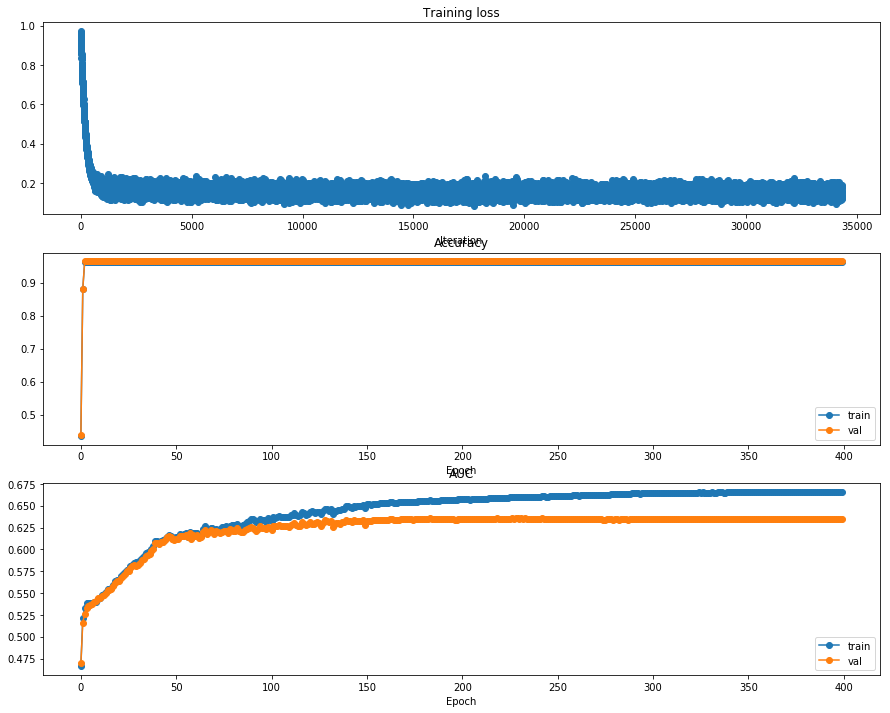

In [6]:
data_vis(nn_model)

Finer search here but should cost considerable time

In [ ]:
from MY_NN import NeuralNetwork
train_hist={}
best_net = None
best_auc =0
for i in range(10):
    #learnning_rate 5e-4 too large
    weight_decay = 10** (np.random.uniform(-5,-3))#L2 
    learning_rate = 10** (np.random.uniform(-5.5,-3))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,learning_rate = learning_rate,num_epochs=80,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,batchnorm=True)
    print('Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay))
    describe= 'Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay)
    nn_model.train()
    print('Val aus is {}. Train auc is {}'.format(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1]))
    if nn_model.auc_history['val'][-1]> best_auc:
        best_auc =nn_model.auc_history['val'][-1]
        best_net = nn_model
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    if (i+1) %10 ==0:
        print('You have finished {}!!'.format(i+1))

train_hist['best_net'] = best_net
filename= 'search_lr_wd.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_hist, f)

Learning rate is 0.00020406927268633738. Weight decay is 0.0008021124318505044
Val aus is 0.6317421740076681. Train auc is 0.6791059413712075
Learning rate is 0.00015493820527177172. Weight decay is 0.0008104257925743996
Val aus is 0.6330116090802047. Train auc is 0.6654130268843802
Learning rate is 0.00011280697210265712. Weight decay is 0.00022878098723526239
Val aus is 0.6150286814657072. Train auc is 0.6313906017203497
Learning rate is 7.651260359148915e-06. Weight decay is 2.6327288973450546e-05
Val aus is 0.5515363038949513. Train auc is 0.5470427497716127
Learning rate is 5.55017362248129e-05. Weight decay is 0.0006954451651473917
Val aus is 0.6209540032022394. Train auc is 0.6257346869824794
Learning rate is 3.513556802668994e-06. Weight decay is 0.00010345946256136488
Val aus is 0.530607868619493. Train auc is 0.5191439264170947
Learning rate is 0.00041679711472788464. Weight decay is 0.00017450057767011
Val aus is 0.6299209582212122. Train auc is 0.7003492741546931
Learning r

In [5]:
from MY_NN import NeuralNetwork
#choose the best among finer search
lr =0.00015493820527177172
wd = 0.0008104257925743996
nn_model = NeuralNetwork(data,learning_rate = lr,num_epochs=80,verbose=True,
                             weight_decay=wd,batchnorm=True)
nn_model.train()

Epoch 0: iteration 0, the loss is [ 0.96388286]
  acc for train: 0.43534506897646025, acc for val: 0.4365957923425862
  auc for train: 0.46641468653097995, auc for val: 0.4694342688795342
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.63663191]
  acc for train: 0.8803925777968601, acc for val: 0.8812652840262092
  auc for train: 0.5210164423005953, auc for val: 0.5161746400086831
--------------------------------------------------------------
Epoch 0: iteration 200, the loss is [ 0.45769787]
  acc for train: 0.9634326756146279, acc for val: 0.9639250312680842
  auc for train: 0.5328574174698167, auc for val: 0.5266127325223127
--------------------------------------------------------------
Epoch 0: iteration 300, the loss is [ 0.35054463]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5385647540666245, auc for val: 0.5334625369541983
-----------------------------------------------------------

The most expensive search final

In [ ]:
hidden_size = [230,220,210,200]
from MY_NN import NeuralNetwork
from datetime import datetime
train_hist={}
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374

for i in range(5):
    #learnning_rate 5e-4 too large
    tic = datetime.now()
    weight_decay = 10** (np.random.uniform(-3,-1))#L2 
    learning_rate = 10** (np.random.uniform(-4,np.log10(5e-4)))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,hidden_size=hidden_size,learning_rate = learning_rate,num_epochs=55,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,batchnorm=True)
    print('Learning rate is {}. Weight decay is {}. dropout is {}'.format(learning_rate, weight_decay,dropout))
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}'.format(learning_rate, weight_decay, dropout)
    nn_model.train()
    print('Val aus is {}. Train auc is {}'.format(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1]))
    if nn_model.auc_history['val'][-1]> best_auc:
        best_auc =nn_model.auc_history['val'][-1]
        best_net = nn_model
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

train_hist['best_net'] = best_net
filename= 'search_lr_wd2.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_hist, f)

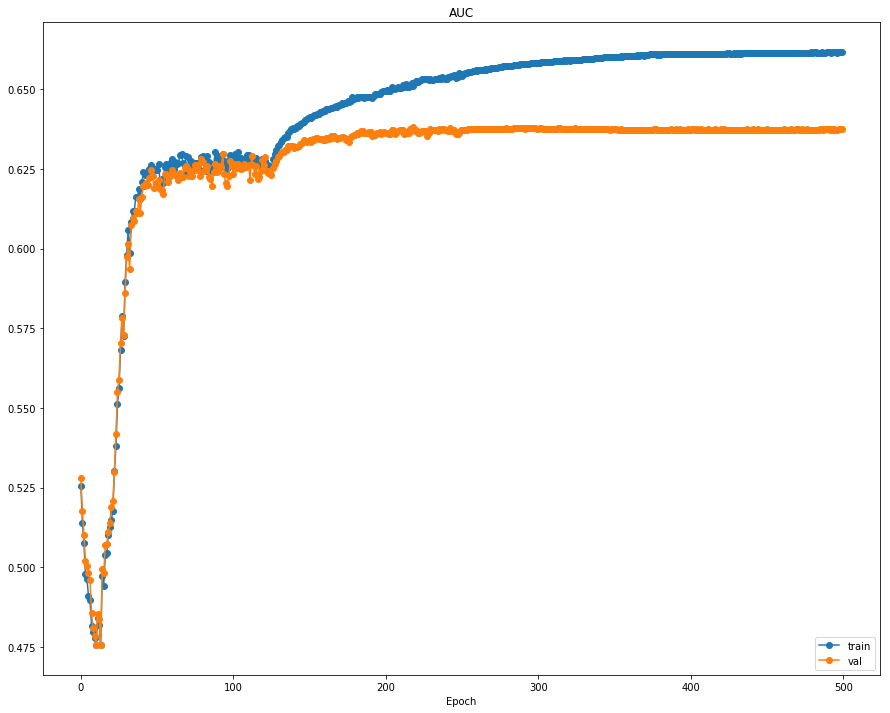

In [10]:
nn_model= best_net

data_vis.nnplot(nn_model, loss=False, acc=False)

# New processing: preprocess cell

In [2]:
import data_util
import data_preprocess
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np 

rso = np.random.RandomState(66)

train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

lv1_pre = data_preprocess.preprocess_cell()

X_train = train_data.drop(['id','target'],axis=1)
y_train = train_data['target']
y_train

X_train, X_train_test, y_train, y_train_test = train_test_split(X_train,y_train,test_size =0.1 ,random_state=rso)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size =0.2, random_state=rso)

X_train, y_train = lv1_pre.process(X_train, y=y_train, rso =rso)
X_val = lv1_pre.process(X_val,test=True,rso =rso)
X_train_test = lv1_pre.process(X_train_test,test=True,rso =rso)
X_dev, y_dev = X_train[:10000,:], y_train[:10000]

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
data ={}
#enter df here
data['X_train'] = X_train
data['X_val'] = X_val
data['y_train'] = y_train
data['y_val'] =y_val
X_train = None
X_val = None

In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime
#only use step decay for now
#coarse search
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 237
hidden_size= [230,220,210]
lr_decay = {'step_size': 25, 'gamma':0.1}

train_hist={}
for i in range(100):
    #learnning_rate 5e-4 too large
    tic = datetime.now()
    dropout = np.random.uniform(0,1)
    weight_decay = 10** (np.random.uniform(-3,3))#L2 
    learning_rate = 10** (np.random.uniform(-6,-2))
    
    nn_model = NeuralNetwork(data,input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=5,
                             verbose=None,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train()
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    print(describe)
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))


In [9]:
for i in sorted(train_hist, key =lambda x:x[0], reverse=True):
    print(train_hist[i])


Learning rate is 0.0001697748323692106. Weight decay is 0.01611014195754915. dropout is 0.8633795643083599
 Val aus is 0.6003277112111378. Train auc is 0.6346519767601385
Learning rate is 0.00011292573215690098. Weight decay is 0.0025168409474830154. dropout is 0.7474963413998843
 Val aus is 0.5997970907137983. Train auc is 0.633021357700171
Learning rate is 0.0004576885112175419. Weight decay is 0.7826435311885301. dropout is 0.6981187592989551
 Val aus is 0.5951053802842754. Train auc is 0.6484250603014419
Learning rate is 0.0035761607375581514. Weight decay is 0.00729795832118471. dropout is 0.8336651558501216
 Val aus is 0.5949200266604695. Train auc is 0.6517912182364991
Learning rate is 6.0618015129868076e-05. Weight decay is 0.00496681831649462. dropout is 0.5197983413792601
 Val aus is 0.593480985335158. Train auc is 0.657112285152382
Learning rate is 2.520241184671594e-05. Weight decay is 0.008209244622133769. dropout is 0.39878113804746995
 Val aus is 0.5896564177744055. Trai

# Finer Search

In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 237
hidden_size= [230,220,210]
lr_decay = {'step_size': 5, 'gamma':0.5}

train_hist={}
for i in range(5):
    tic = datetime.now()
#     dropout = np.random.uniform(0.5,1)
#     weight_decay = 10** (np.random.uniform(-1,1))#L2 
#     learning_rate = 10** (np.random.uniform(-4,-2))
    
    
    dropout = 0.8
    weight_decay = 10** (np.random.uniform(-1,1))#L2 
    learning_rate = 10** (np.random.uniform(-4,-2))
    
    nn_model = NeuralNetwork(input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=10,
                             verbose=None,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay)
    nn_model.train(data)
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    print(describe)
    if nn_model.auc_history['val'][-1]> best_auc:
        best_auc =nn_model.auc_history['val'][-1]
        best_net = nn_model
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

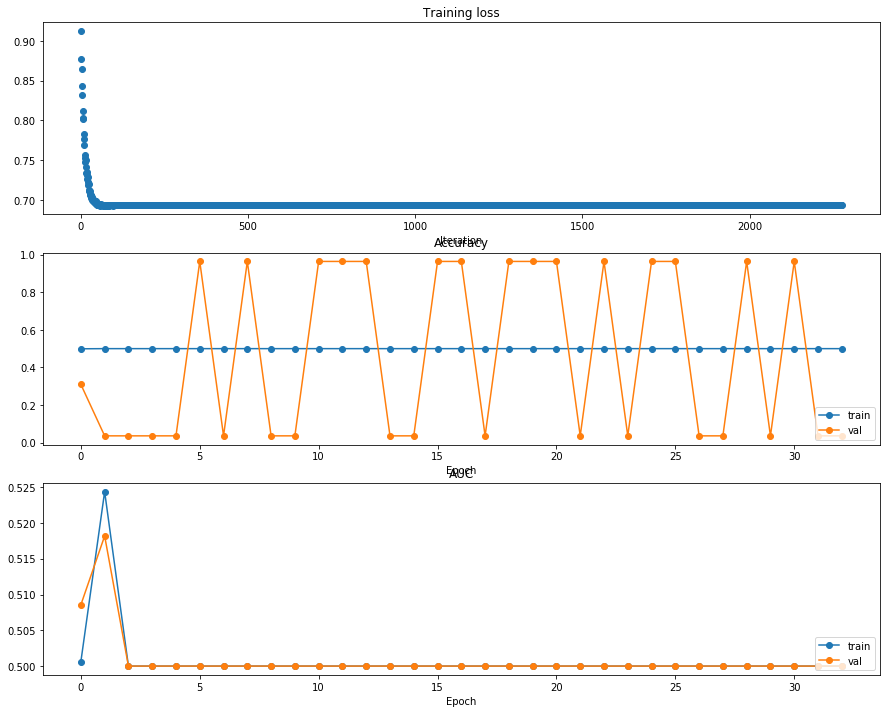

In [5]:
data_vis.nnplot(nn_model)

# Try a specific one:

# We train for ensemble this time

In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime

best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 237
hidden_size= [230,220,210]
lr_decay = {'step_size': 25, 'gamma':0.1}
for i in range(5):
    #learnning_rate 5e-4 too large
    train_hist={}
    tic = datetime.now()
    weight_decay = 10** (np.random.uniform(-3,-1))#L2 
    learning_rate = 10** (np.random.uniform(-4,np.log10(5e-4)))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,input_size = input_size, hidden_size=hidden_size,learning_rate = learning_rate,num_epochs=70,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train()
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])

    print(describe)
    train_hist['describe']= describe
    train_hist['net'] = nn_model
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

    filename= 'search_lr_wd_ensemble{}.pkl'.format(i)
    with open(filename, 'wb') as f:
        pickle.dump(train_hist, f)

In [10]:
! rm search_lr_wd_ensemble0.pkl